# Entrenamiento de red ResNet para clasificación de signo a texto.

---
---

# Índice.

- [Configuración](#configuración)
  - [Configuración de la red](#configuración-de-la-red)
  - [Dispositivo](#dispositivo-en-el-que-se-ejecuta-la-red)
- [Carga de datos](#carga-de-datos)
- [Entrenamiento](#entrenamiento)
  - [Creación del modelo](#creacion-del-modelo-a-entrenar)
  - [Entrenamiento](#entrenamiento)
  - [Gráfica de costes](#plot-de-los-costes-según-el-epoch)
- [Prueba](#prueba)
  - [Comprobando accuracy en batch](#comprobando-accuracy-en-un-batch)
  - [Comprobando una etiqueta específica](#comprobando-una-etiqueta-en-concreto)
- [Exportamos modelo](#exportamos-modelo)

## Configuración

---

### Hiperparámetros de la red

In [29]:
from config.const import LEARNING_RATE, BATCH_SIZE, NUM_EPOCHS, TRAIN_SPLIT, IMAGE_SIZE

In [30]:
print(
    f"LEARNING_RATE: {LEARNING_RATE}. BATCH_SIZE: {BATCH_SIZE}. NUM_EPOCHS: {NUM_EPOCHS}. TRAIN_SPLIT: {TRAIN_SPLIT}. IMAGE_SIZE: {IMAGE_SIZE}"
)

LEARNING_RATE: 0.001. BATCH_SIZE: 128. NUM_EPOCHS: 25. TRAIN_SPLIT: 0.7. IMAGE_SIZE: (224, 224)


### Configuración de torch. 

In [31]:
from config.torch import get_device, get_transform

In [32]:
device = get_device()
print(f"Device: {device}")

Device: cuda


In [33]:
transform = get_transform(IMAGE_SIZE)
transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

### Elección del dataset

In [34]:
from config.dataset import get_dataset_info, get_datasets

In [35]:
datasets = get_datasets()
print("Available local datasets: ")
datasets

Available local datasets: 


{'WLASL': {'name': 'WLASL_frames_100', 'path': 'WLASL/frames_100'},
 'animals': {'name': 'animals_simple', 'path': 'animals/all'}}

In [36]:
DATASET = "animals"
data_path, model_path = get_dataset_info(DATASET)
print(f"Dataset: {DATASET}. Data path: {data_path}. Model path: {model_path}")

Dataset: animals. Data path: d:\Proyectos\TFG\Sign2Text\Project\data\animals\all. Model path: d:\Proyectos\TFG\Sign2Text\Project\models\resnet_animals_simple.pth


## Carga de datos

---

In [37]:
from utils.loader import split_dataset, get_dataset

### Se carga el dataset

In [38]:
dataset, classes = get_dataset(data_path, transform)

print(f"Some classes in dataset: {classes[:5]}")

Some classes in dataset: ['butterfly', 'cat', 'chicken', 'cow', 'dog']


### Ejemplo de entrada y salida del dataset

In [39]:
from utils.output import show_image
from numpy.random import randint

Target of image is: 'cow'


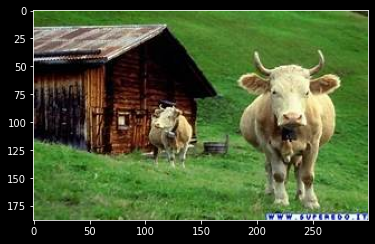

In [40]:
rand_index = randint(0, len(dataset))
img, target = dataset.imgs[rand_index]

print(f"Target of image is: '{classes[target]}'")
show_image(img)

### Divide el dataset en entrenamiento y test

In [41]:
train_loader, test_loader = split_dataset(dataset, TRAIN_SPLIT, BATCH_SIZE)

print(
    f"Number of batches for tranning: {len(train_loader)}. Number of batches for testing: {len(test_loader)}. ({BATCH_SIZE} images/batch)"
)

Number of batches for tranning: 156. Number of batches for testing: 67. (128 images/batch)


## Entrenamiento

---

### Creación del model a entrenar


In [42]:
from lib.model import create_model

In [43]:
num_classes = len(classes)
model = create_model(num_classes)

### Entrenamiento

In [44]:
from lib.train import train_model

In [45]:
costs = train_model(
    model,
    train_loader=train_loader,
    device=device,
    learning_rate=LEARNING_RATE,
    num_epochs=NUM_EPOCHS,
)

Training on device: cuda
Cost at epoch 1 is 0.22847
Cost at epoch 2 is 0.11412
Cost at epoch 3 is 0.10027


### Plot de los costes según el epoch

In [ ]:
from utils.output import plot_costs

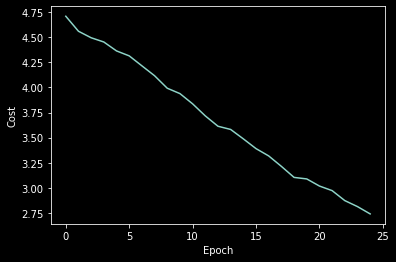

In [ ]:
plot_costs(costs)

## Prueba

---

In [ ]:
from lib.test import check_accuracy, predict_class

### Comprobando accuracy en un batch

Checking accuracy on TRAIN set batch
Images for 1


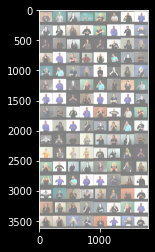

Predictions for batch 1 
['language', 'candy', 'deaf', 'go', 'enjoy', 'what', 'but', 'meet', 'forget', 'cool', 'family', 'study', 'time', 'tell', 'thanksgiving', 'bird', 'pull', 'drink', 'blue', 'dog', 'birthday', 'study', 'blue', 'fine', 'book', 'orange', 'work', 'year', 'many', 'enjoy', 'blue', 'time', 'secretary', 'cool', 'like', 'tall', 'go', 'drink', 'book', 'paper', 'walk', 'woman', 'dog', 'who', 'corn', 'cousin', 'woman', 'thursday', 'cheat', 'help', 'chair', 'letter', 'family', 'son', 'letter', 'cow', 'dance', 'chair', 'family', 'no', 'letter', 'table', 'deaf', 'pull', 'color', 'family', 'give', 'drink', 'language', 'book', 'corn', 'computer', 'corn', 'change', 'now', 'no', 'man', 'clothes', 'color', 'cheat', 'chair', 'same', 'hearing', 'computer', 'black', 'walk', 'thin', 'time', 'letter', 'shirt', 'africa', 'woman', 'paper', 'book', 'drink', 'book', 'basketball', 'many', 'help', 'many', 'letter', 'chair', 'computer', 'drink', 'dark', 'graduate', 'meet', 'book', 'woman', 'kiss

In [ ]:
print("Checking accuracy on TRAIN set batch")
check_accuracy(train_loader, model, classes, device)

Checking accuracy on TEST set batch
Images for 1


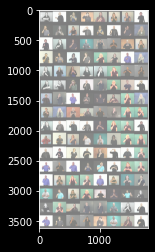

Predictions for batch 1 
['enjoy', 'like', 'kiss', 'language', 'hearing', 'book', 'pink', 'no', 'drink', 'paper', 'clothes', 'blue', 'pull', 'shirt', 'computer', 'cousin', 'go', 'time', 'woman', 'what', 'basketball', 'chair', 'language', 'book', 'pink', 'finish', 'year', 'who', 'color', 'right', 'white', 'pull', 'family', 'bird', 'woman', 'short', 'orange', 'no', 'chair', 'family', 'full', 'man', 'letter', 'wrong', 'thin', 'kiss', 'no', 'drink', 'drink', 'thanksgiving', 'letter', 'now', 'many', 'woman', 'who', 'paper', 'book', 'birthday', 'study', 'computer', 'now', 'how', 'africa', 'time', 'drink', 'like', 'bird', 'need', 'chair', 'orange', 'birthday', 'drink', 'language', 'want', 'chair', 'thin', 'woman', 'pink', 'drink', 'play', 'africa', 'shirt', 'blue', 'family', 'wrong', 'black', 'same', 'letter', 'many', 'what', 'corn', 'kiss', 'corn', 'cook', 'study', 'city', 'color', 'book', 'all', 'cook', 'bowling', 'chair', 'woman', 'city', 'man', 'woman', 'book', 'dance', 'now', 'letter', '

In [ ]:
print("Checking accuracy on TEST set batch")
check_accuracy(test_loader, model, classes, device)

### Comprobando una etiqueta en concreto

In [ ]:
label = "apple"

Prediction for apple and TRAIN set


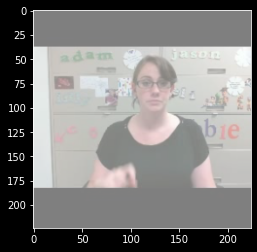

Prediction: walk. Ground truth: apple


In [ ]:
print(f"Prediction for {label} and TRAIN set")
predict_class(train_loader, model, classes, label, device)

Prediction for apple and TEST set


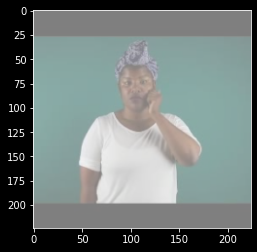

Prediction: later. Ground truth: apple


In [ ]:
print(f"Prediction for {label} and TEST set")
predict_class(test_loader, model, classes, label, device)

## Exportamos modelo

---

In [ ]:
from lib.model import export_model

In [ ]:
export_model(model, model_path)
print(f"Model exported to {model_path}")

Model exported to d:\Proyectos\TFG\Sign2Text\Project\models\resnet_WLASL_frames_100.pth
